# Tarea 6 - Pronostico
En esta tarea intentare usar un modelo de regresion lineal, para intentar predecir el número de variables que mejor predice la cantidad de puntos anotados por un jugador.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error



M_Final_DB = pd.read_csv('C:/Users/Mauricio/Documents/Maestría en Ciencia de Datos/Segundo Tetramestre/Aprendizaje Automatico/Final_DB_Modificado.csv')
DB_Pronostico = M_Final_DB[['PTS','USG%','2PA','2P%','3PA','3P%','FTA','FT%','TOV']]

In [2]:
X = DB_Pronostico.drop('PTS',axis=1)
y = DB_Pronostico['PTS']
X_const = sm.add_constant(X)
modelo = sm.OLS(y, X_const).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1699.
Date:                Thu, 20 Nov 2025   Prob (F-statistic):          2.92e-318
Time:                        19:04:11   Log-Likelihood:                -698.64
No. Observations:                 436   AIC:                             1415.
Df Residuals:                     427   BIC:                             1452.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.4436      0.652    -22.147      0.0

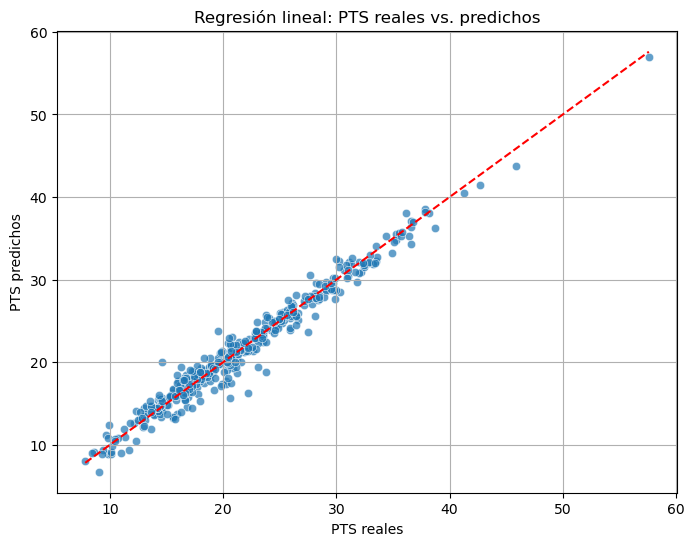

In [3]:
y_pred = modelo.predict(X_const)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # línea de referencia
plt.xlabel("PTS reales")
plt.ylabel("PTS predichos")
plt.title("Regresión lineal: PTS reales vs. predichos")
plt.grid(True)
plt.show()

Este modelo explica el 96.9% de la variabilidad lo cual nos dice que es un excelente modelo de predicción. Esto suena lógico pues literalmente tiene todas las variables que definen esto. Como lo son Intentos de Tiro y % de acierto. 

Viendo un análisis más profundo encontramos que los coeficioentes más importantes son los % de acierto y el que más penalisa los puntos son la pérdidas por lo que podemos decir que entre más alto sea el porcentaje de acierto de un jugador y menor sea su número de perdidas su número de puntos anotados va ser mayor.

In [4]:
y_pred = modelo.predict(X_const)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = mean_squared_error(y, y_pred, squared=False)
mape = np.mean(np.abs((y - y_pred) / y)) * 100

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

MAE: 0.86
MSE: 1.44
RMSE: 1.20
MAPE: 4.46%


c:\Users\Mauricio\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Resultado:

| Métrica | Valor | Interpretación |
|--------|-------|----------------|
| **MAE** | 0.86  | En promedio, el modelo se equivoca por 0.86 puntos en la predicción de PTS. |
| **MSE** | 1.44  | El error cuadrático medio penaliza más los errores grandes, pero en general parece que es bajo | |
| **MAPE** | 4.46% | El modelo comete un error relativo promedio del 4.46%, es decir podemos presumir que en general el modelo se equivoca por menos del 5%|
